In [1]:
# setup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# setup: has to be in a separate cell for some reason
plt.rcParams['figure.figsize'] = [15, 6]

# More than one species?

Let's get some species *interactions* happening!
Suppose that a *prey* species follows the dynamics above,
except that *also*,
5. Each prey is eaten by a predator, with probability $a$ per predator,
    and turned into a Poisson($b$) number of new predators.
6. Each predator dies with probability $q$.

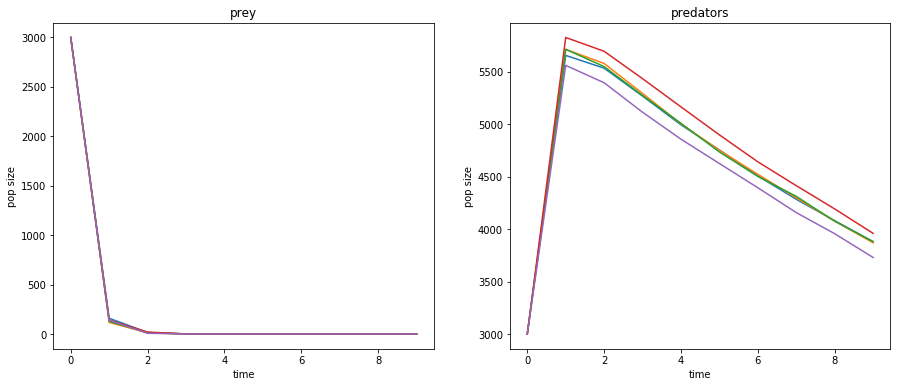

In [18]:
def pred_prey_gen(N, M, lam, p, a, K, b, q):
    assert(len(M) == len(N))
    num_eat =  np.random.binomial(N, 1 - np.power(1 - a, M), len(N))
    next_N = (np.random.poisson(lam * N * np.fmax(0.0, 1 - N / K), len(N)) 
              + np.random.binomial(N - num_eat, p, len(N)))
    next_M = (np.random.binomial(M, q, len(M))
              + np.random.poisson(b * num_eat, len(M)))
    return next_N, next_M

# run five simulations
N = np.empty((10, 5), dtype='int')
M = np.empty(N.shape, dtype='int')
N[0, :] = 3000
M[0, :] = 3000
for t in range(1, len(N)):
    N[t, :], M[t, :] = pred_prey_gen(N[t-1, :], M[t-1, :], lam=0.1, p=0.95, K=2000,
                            a=0.001, b=1, q=0.95)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(N)
ax.set_title('prey')
ax.set_xlabel("time")
ax.set_ylabel("pop size")
ax = fig.add_subplot(122)
ax.set_title('predators')
ax.plot(M, label='logistic growth')
ax.set_xlabel("time")
ax.set_ylabel("pop size")
plt.show()

# Phase plots, predator-prey

Equilibrium =  (999.9999999999998, -4454.545454545454) 
r =  1.0899999999999999


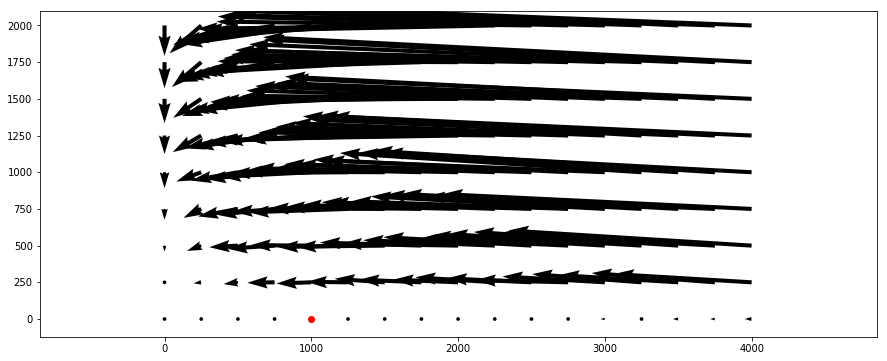

In [69]:
def pred_prey_gen(N, M, lam, p, a, K, b, q):
    assert(len(M) == len(N))
    num_eat =  np.random.binomial(N, 1 - np.power(1 - a, M), len(N))
    next_N = (np.random.poisson(lam * N * np.fmax(0.0, 1 - N / K), len(N)) 
              + np.random.binomial(N - num_eat, p, len(N)))
    next_M = (np.random.binomial(M, q, len(M))
              + np.random.poisson(b * num_eat, len(M)))
    return next_N, next_M

lam = 1.1 # prey fecundity per year
p = 0.99  # prey survival prob
K = 200   # prey carrying capacity
a = 0.001 # pred-prey encounter rate
b = 0.1   # prey->pred conversion rate
q = 0.9  # pred survival prob
equil = ((1-q)/(a*b), (p + lam - 1 - (1-q) * lam / (a*b*K))/(a*p))
print("Equilibrium = ", equil, "\nr = ", p + lam - 1)
X, Y = np.meshgrid(range(0, 4001, 250), range(0, 2001, 250))
X.shape = Y.shape = (np.prod(X.shape),)
U, V = pred_prey_gen(X, Y, lam=lam, p=p, K=K, a=a, b=b, q=q)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.axis('equal')
ax.quiver(X, Y, U-X, V-Y, angles='xy', scale_units='xy', scale=1)
ax.scatter(max(0.0, equil[0]), max(0.0, equil[1]), color='r')
plt.show()

# Competition

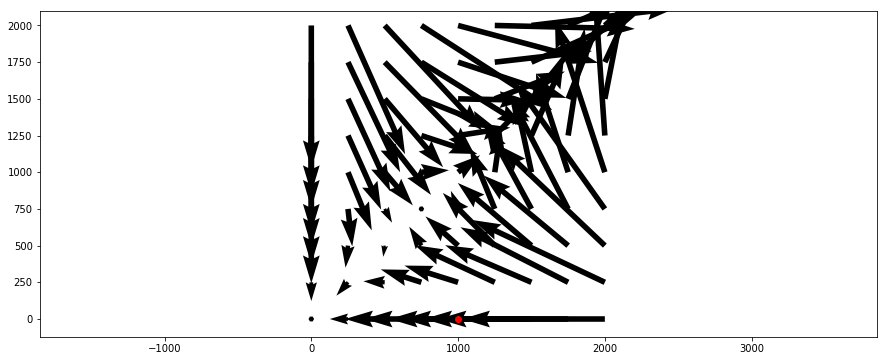

In [75]:
def competition_gen(N, M, lam, p, K, a, b):
    assert(len(M) == len(N))
    M_eat_N =  np.random.binomial(N, 1 - np.power(1 - a[0], M), len(N))
    N_eat_M =  np.random.binomial(M, 1 - np.power(1 - a[1], N), len(N))
    next_N = (np.random.binomial(N - M_eat_N, p[0], len(N))
              + np.random.poisson(lam[0] * N * np.fmax(0.0, 1 - N / K[0])
                                  + b[0] * N_eat_M, len(N)))
    next_M = (np.random.binomial(M - N_eat_M, p[1], len(N))
              + np.random.poisson(lam[1] * M * np.fmax(0.0, 1 - M / K[1])
                                  + b[1] * M_eat_N, len(N)))
    return next_N, next_M

lam = [1.1, 1.1]    # fecundity
p = [0.5, 0.5]      # survival prob
K = [200, 200]      # carrying capacity
a = [0.001, 0.001]  # encounter rate
b = [1.5, 1.5]      # prey->pred conversion rate
q = [0.9, 0.9]      # pred survival prob
X, Y = np.meshgrid(range(0, 2001, 250), range(0, 2001, 250))
X.shape = Y.shape = (np.prod(X.shape),)
U, V = competition_gen(X, Y, lam=lam, p=p, K=K, a=a, b=b)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.axis('equal')
ax.quiver(X, Y, U-X, V-Y, angles='xy', scale_units='xy', scale=1)
ax.scatter(max(0.0, equil[0]), max(0.0, equil[1]), color='r')
plt.show()